In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
matches = pd.read_csv("/Users/JordanCuff/Downloads/sportsref_download-5.csv")

In [10]:
#read dataset head 
matches.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,LongCmp%,Ast,xAG,xA,KP,1/3,PPA,CrsPA,Prog,Match Report
0,2022-02-26,13:00 (10:00),MLS,Regular Season,Sat,Away,D,1,1,Philadelphia,...,57.6,1,0.9,0.9,12,28,8,2,26,Match Report
1,2022-03-05,17:00 (15:00),MLS,Regular Season,Sat,Home,D,1,1,Nashville,...,57.5,0,0.8,1.2,9,45,3,0,39,Match Report
2,2022-03-13,19:00 (16:00),MLS,Regular Season,Sun,Away,W,1,0,NY Red Bulls,...,41.3,1,0.7,0.6,5,25,3,1,24,Match Report
3,2022-03-19,19:00 (17:00),MLS,Regular Season,Sat,Home,W,1,0,San Jose,...,55.7,0,1.0,0.7,9,24,4,1,30,Match Report
4,2022-04-02,19:00 (17:00),MLS,Regular Season,Sat,Home,L,1,2,Seattle,...,63.6,0,0.9,1.0,11,36,12,3,31,Match Report


In [7]:
#Get total counts for wins and losses
matches['Result'].value_counts()

W    14
L    14
D     7
Name: Result, dtype: int64

In [8]:
#total count of home and away matches 

matches['Venue'].value_counts()

Away    18
Home    17
Name: Venue, dtype: int64

In [9]:
#Average completion % of Long Passes in all games 
matches['LongCmp%'].mean()

53.15714285714286

In [78]:
#Average long pass completion against all opponents 

matches.groupby('Opponent')['LongCmp%'].mean()


Opponent
Austin              47.85
Chicago Fire        46.60
Colorado Rapids     49.40
D.C. United         60.90
FC Cincinnati       61.80
FC Dallas           52.60
Houston Dynamo      49.55
Inter Miami         56.90
LA Galaxy           56.15
Los Angeles FC      49.85
NY Red Bulls        41.30
NYCFC               60.00
Nashville           45.15
New England         53.20
Philadelphia        57.60
Portland Timbers    57.80
Real Salt Lake      57.05
San Jose            57.85
Seattle             52.45
Sporting KC         55.10
Vancouver           54.00
Name: LongCmp%, dtype: float64

<AxesSubplot: xlabel='Opponent'>

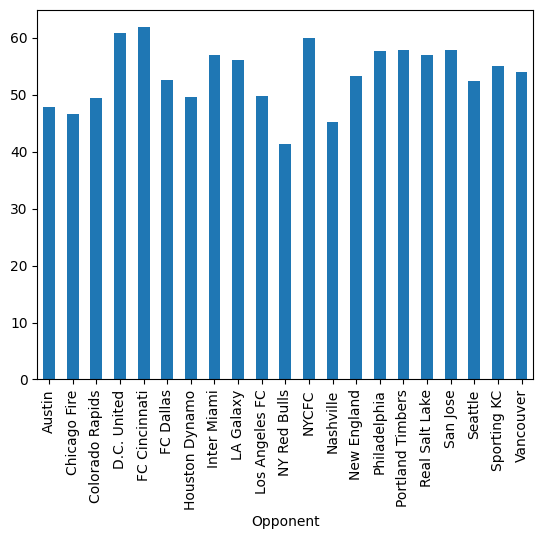

In [11]:
#Average long pass completion against all opponents bar graph

matches.groupby('Opponent')['LongCmp%'].mean().plot(kind='bar')

In [12]:
matches.columns

Index(['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'ShCmp',
       'Att.1', 'ShCmp%', 'MedCmp', 'Att.2', 'MedCmp%', 'LongCmp', 'Att.3',
       'LongCmp%', 'Ast', 'xAG', 'xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog',
       'Match Report'],
      dtype='object')

<AxesSubplot: xlabel='Date'>

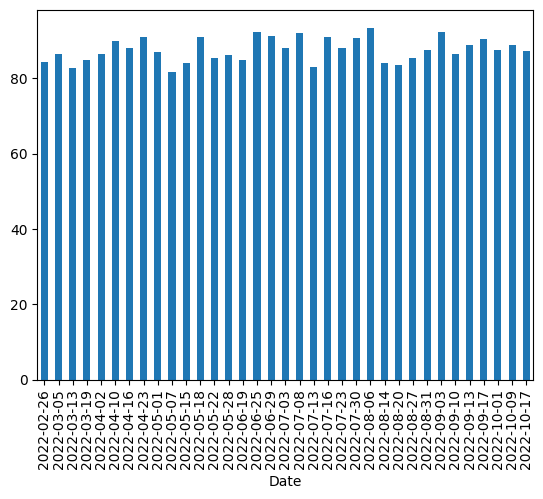

In [22]:
#Average completion percentage of Short Passes 

matches.groupby('Date')['ShCmp%'].mean().plot(kind='bar')

In [235]:
((matches[matches['Result'] == 'W'][matches['Venue'] == 'Away']['Opponent'].value_counts()))

/var/folders/z9/yx7qb12d66s57rbmx2llg5d40000gn/T/ipykernel_8492/1852112868.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ((matches[matches['Result'] == 'W'][matches['Venue'] == 'Away']['Opponent'].value_counts()))


NY Red Bulls      1
FC Dallas         1
LA Galaxy         1
Vancouver         1
Houston Dynamo    1
Nashville         1
Name: Opponent, dtype: int64

<AxesSubplot: ylabel='Frequency'>

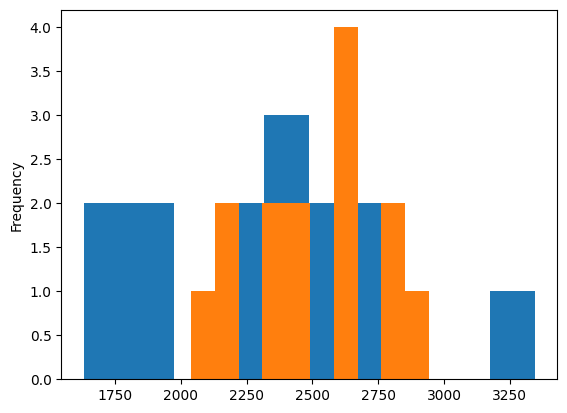

In [92]:
matches[matches['Result'] == 'W']['PrgDist'].plot(kind='hist')
matches[matches['Result'] == 'L']['PrgDist'].plot(kind='hist')

<AxesSubplot: xlabel='Date'>

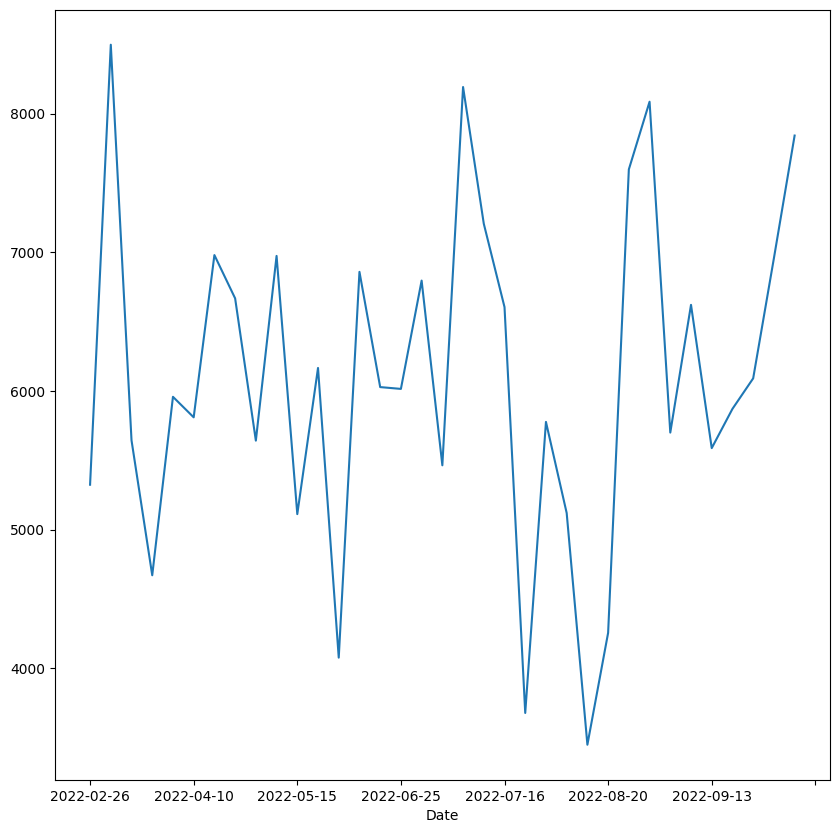

In [94]:
matches.groupby('Date')['TotDist'].mean().plot(figsize=(10,10))


<AxesSubplot: ylabel='Opponent'>

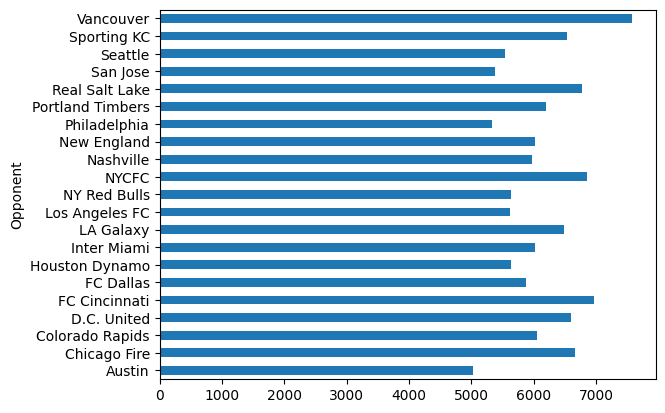

In [75]:
matches.groupby('Opponent')['TotDist'].mean().plot(kind='barh')


<AxesSubplot: xlabel='Opponent', ylabel='TotDist'>

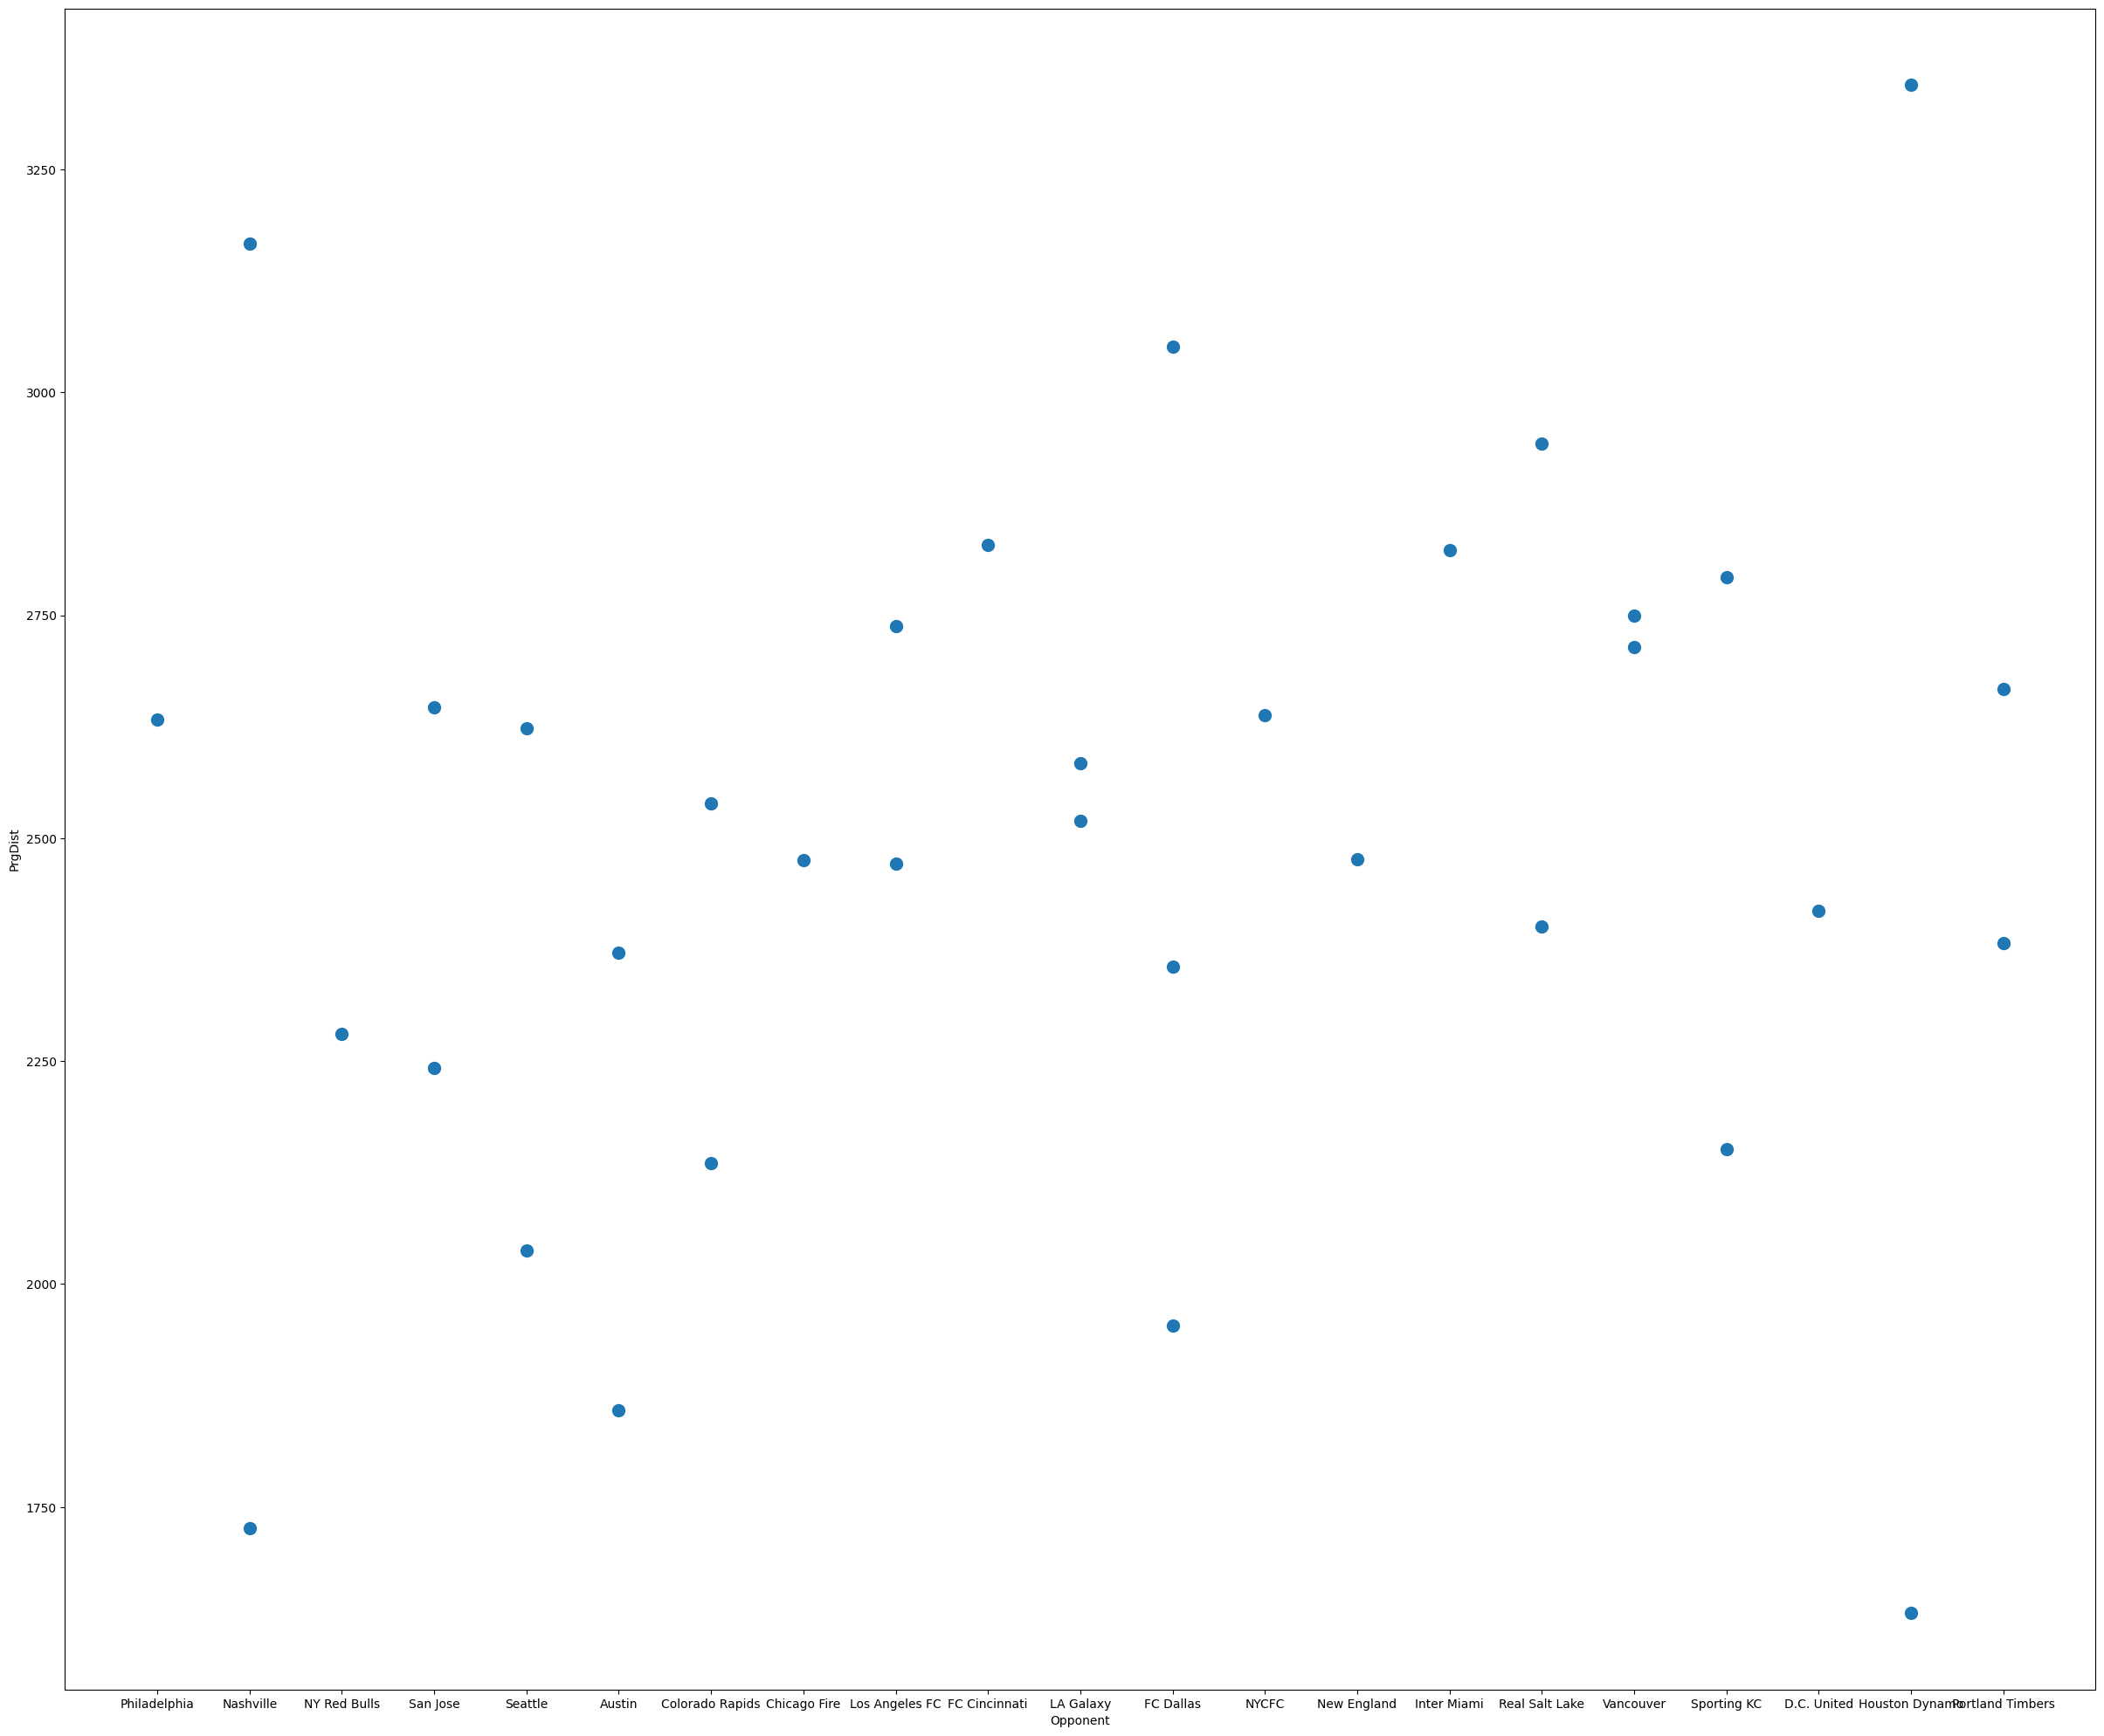

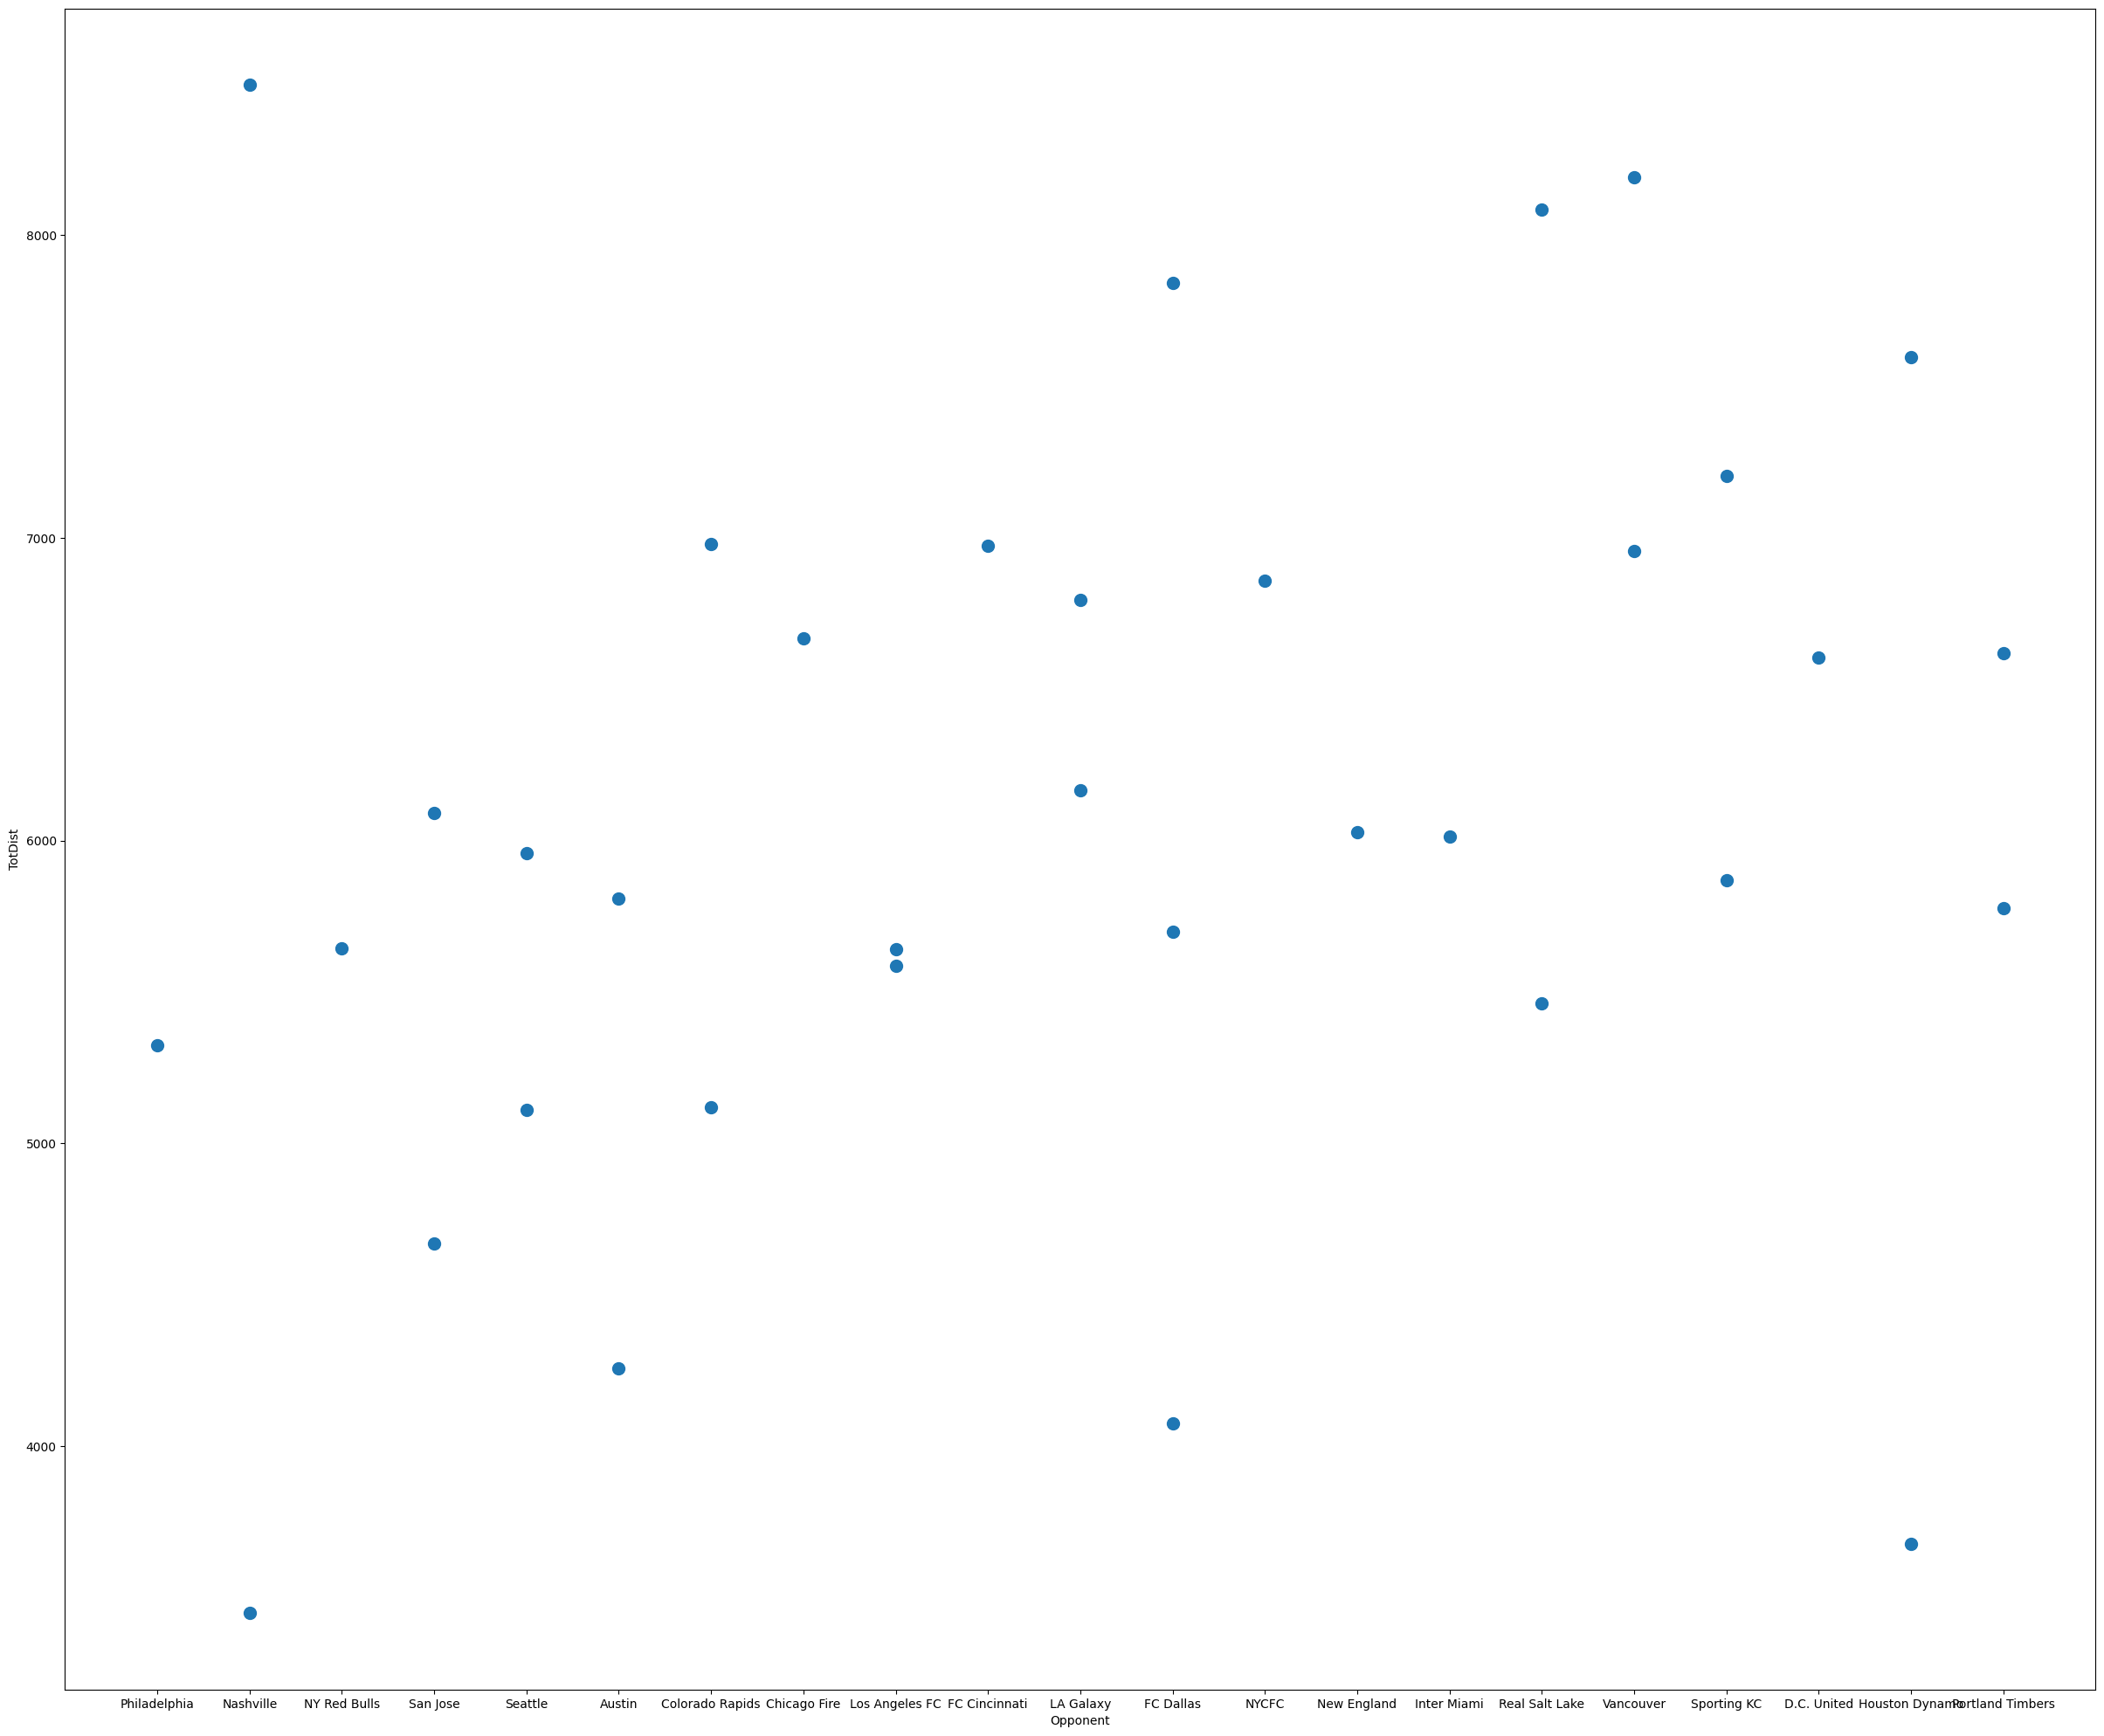

In [106]:
#PrgDist and TotDist Scatter plots 

matches.plot.scatter(x ='Opponent', y = 'PrgDist', s = 100, figsize=(30,25))
matches.plot.scatter(x ='Opponent', y = 'TotDist', s = 100, figsize=(30,25))

In [76]:
round(matches.groupby('Opponent')['PrgDist'].mean())

Opponent
Austin              2115.0
Chicago Fire        2475.0
Colorado Rapids     2338.0
D.C. United         2419.0
FC Cincinnati       2829.0
FC Dallas           2453.0
Houston Dynamo      2488.0
Inter Miami         2823.0
LA Galaxy           2552.0
Los Angeles FC      2605.0
NY Red Bulls        2281.0
NYCFC               2638.0
Nashville           2446.0
New England         2476.0
Philadelphia        2633.0
Portland Timbers    2524.0
Real Salt Lake      2672.0
San Jose            2444.0
Seattle             2330.0
Sporting KC         2472.0
Vancouver           2732.0
Name: PrgDist, dtype: float64

<AxesSubplot: >

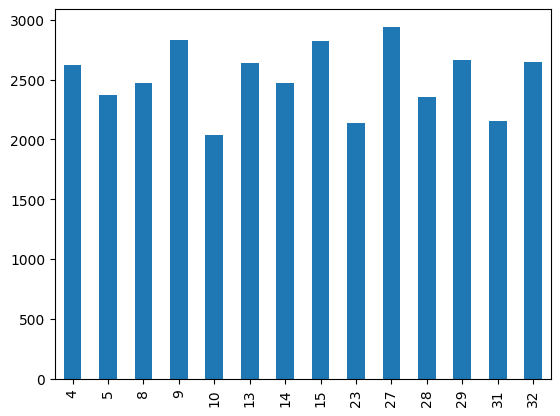

In [239]:
matches[matches['Result'] == 'L']['PrgDist'].plot(kind='bar')


<AxesSubplot: >

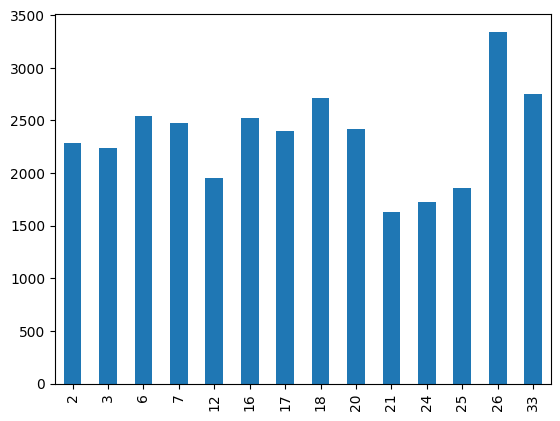

In [240]:
# PrgDist in all matches won 

matches[matches['Result'] == 'W']['PrgDist'].plot(kind='bar')



<AxesSubplot: >

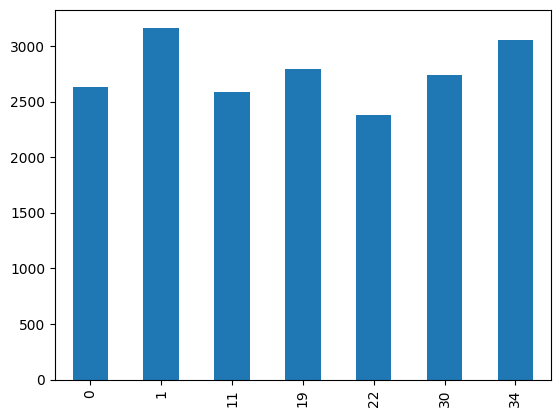

In [241]:
# PrgDist in all draws  

matches[matches['Result'] == 'D']['PrgDist'].plot(kind='bar')

<AxesSubplot: >

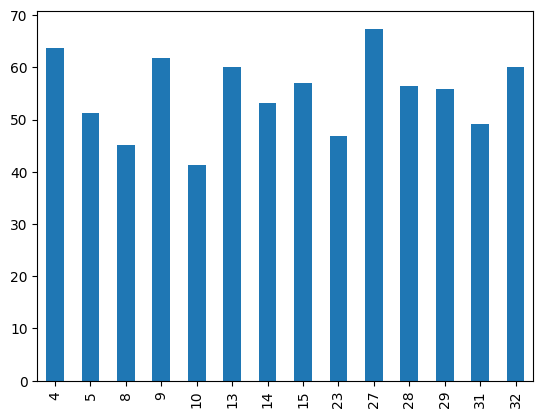

In [113]:
# LongCmp% in matches lost

matches[matches['Result'] == 'L']['LongCmp%'].plot(kind='bar')

<AxesSubplot: >

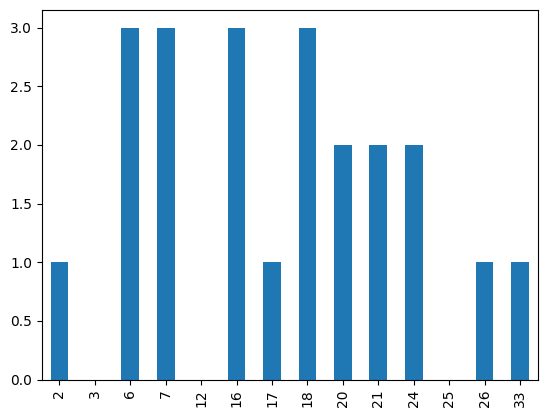

In [114]:
# Assist in matches won

matches[matches['Result'] == 'W']['Ast'].plot(kind='bar')


<AxesSubplot: >

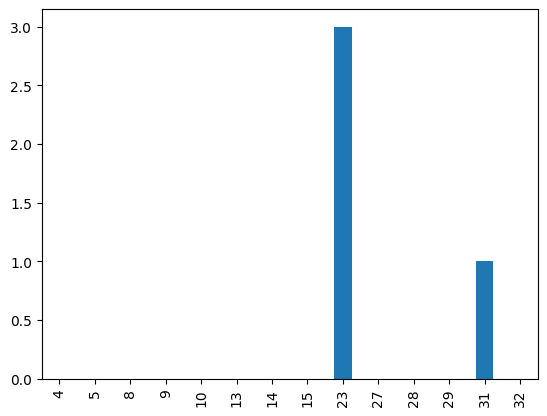

In [115]:
# Assist in matches won

matches[matches['Result'] == 'L']['Ast'].plot(kind='bar')

<AxesSubplot: >

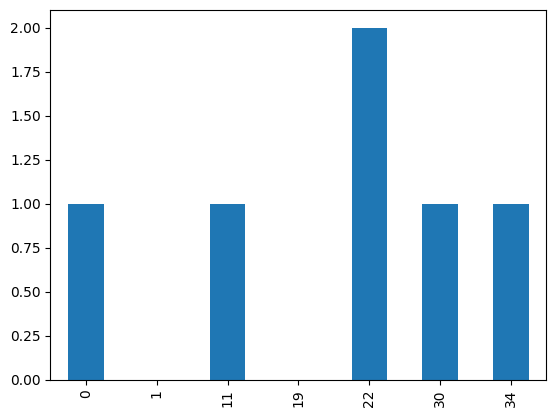

In [116]:
# Assist in matches drawn

matches[matches['Result'] == 'D']['Ast'].plot(kind='bar')

<AxesSubplot: >

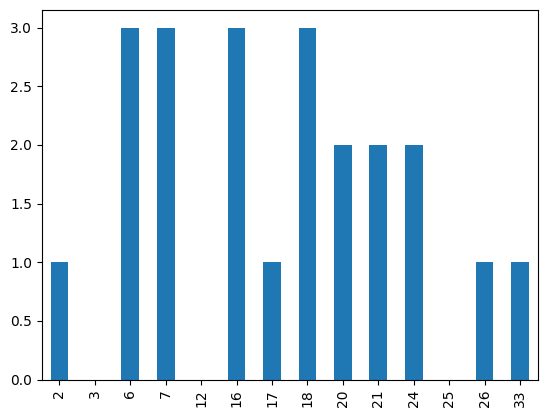

In [157]:
matches[matches['Result'] == 3]['Ast'].plot(kind='bar')

In [245]:
#Change W,L,D to numbers for arthmetic purposes

matches['Result'] = matches['Result'].map({'W': 3, 'D': 1, 'L' : 0})

In [130]:
matches.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,LongCmp%,Ast,xAG,xA,KP,1/3,PPA,CrsPA,Prog,Match Report
0,2022-02-26,13:00 (10:00),MLS,Regular Season,Sat,Away,1,1,1,Philadelphia,...,57.6,1,0.9,0.9,12,28,8,2,26,Match Report
1,2022-03-05,17:00 (15:00),MLS,Regular Season,Sat,Home,1,1,1,Nashville,...,57.5,0,0.8,1.2,9,45,3,0,39,Match Report
2,2022-03-13,19:00 (16:00),MLS,Regular Season,Sun,Away,3,1,0,NY Red Bulls,...,41.3,1,0.7,0.6,5,25,3,1,24,Match Report
3,2022-03-19,19:00 (17:00),MLS,Regular Season,Sat,Home,3,1,0,San Jose,...,55.7,0,1.0,0.7,9,24,4,1,30,Match Report
4,2022-04-02,19:00 (17:00),MLS,Regular Season,Sat,Home,0,1,2,Seattle,...,63.6,0,0.9,1.0,11,36,12,3,31,Match Report


In [154]:
matches.groupby('Result')['PrgDist'].mean()

Result
0    2512.214286
1    2764.000000
3    2346.714286
Name: PrgDist, dtype: float64

In [155]:
matches.groupby('Result')['TotDist'].mean()

Result
0    6133.785714
1    6627.571429
3    5787.214286
Name: TotDist, dtype: float64

In [246]:
matches.groupby('Result')['LongCmp'].mean()

Result
0    42.285714
1    43.428571
3    34.857143
Name: LongCmp, dtype: float64

<AxesSubplot: >

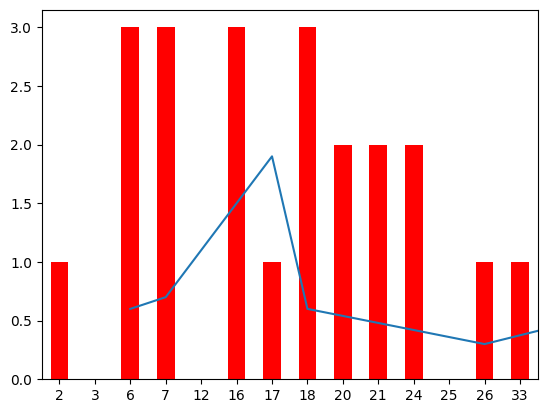

In [160]:
#Plot assist in wins against expected assist

matches[matches['Result'] == 3]['Ast'].plot(kind='bar', color='red')
matches[matches['Result'] == 3]['xA'].plot()

<AxesSubplot: >

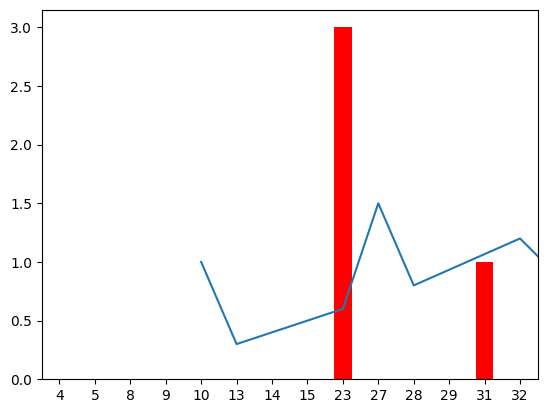

In [248]:
#Plot assist in loss against expected assist



matches[matches['Result'] == 0]['Ast'].plot(kind='bar', color='red')
matches[matches['Result'] == 0]['xA'].plot(kind='line')

<AxesSubplot: >

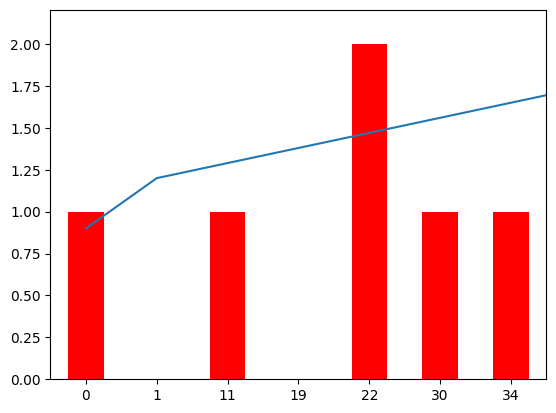

In [162]:
#Plot assist in draws against expected assist



matches[matches['Result'] == 1]['Ast'].plot(kind='bar', color='red')
matches[matches['Result'] == 1]['xA'].plot()

In [5]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [259]:
#define variables for data 

X= matches[['xAG', 'Ast', 'xA']]  
Y= matches[['Result']] 

In [260]:
#train and test data 

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=10)

In [261]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [262]:
#Print Test and Prediction model 

y_pred=logreg.predict(X_test)
print (X_test) #test dataset
print (y_pred)

    xAG  Ast   xA
23  1.2    3  1.3
24  1.0    2  0.4
2   0.7    1  0.6
7   0.8    3  0.6
5   0.3    0  0.3
3   1.0    0  0.7
12  0.2    0  0.3
14  0.5    0  0.9
26  0.6    1  1.0
13  0.8    0  1.2
1   0.8    0  1.2
22  1.4    2  1.5
18  0.8    3  1.0
21  1.2    2  0.6
[3 3 3 3 0 0 0 0 3 0 0 3 3 3]


In [263]:
#Print accuracy metrics 

from sklearn import metrics
from sklearn.metrics import classification_report
print('Accuracy',metrics.accuracy_score(y_test, y_pred))


Accuracy 0.6428571428571429


<AxesSubplot: >

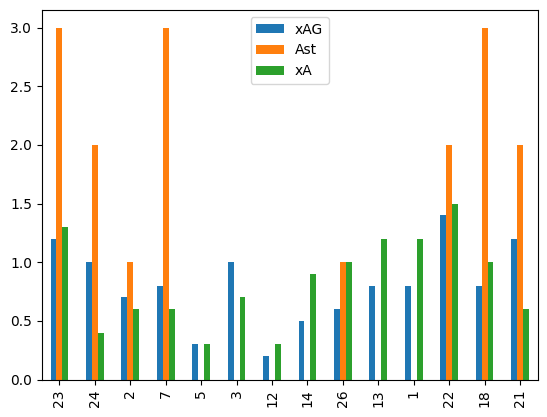

In [232]:
X_test.plot(kind='bar')

y_pred.plot()